In [3]:
using JLD2
using StatsBase
using Plots
#backend(:plotly)
using DataFrames
using CSV

function dataRead(data, range, index::Int)
    df = CSV.read(data, DataFrame, delim=",")
    df = df[!, [2, 3, 5, 6, 8, 13, 14, 15, 16, 17, 4, 11, 10, 12, 7, 9, 1]] #used for soring by ben/cl, including graphCalcs
    #df = df[!, [6, 9, 2, 3, 7, 8, 10, 4, 5, 1]] #used for when sorting by pn/r
    #sort!(df, [:pn, :pr]) #used for when sorting by pn/r
    sort!(df, [:ben, :cl])
    dfData = Matrix{Float64}(df)
    dataArr = zeros(range, range, 1) #transforms [range^2 * 10] arr to [range, range, 1] arr
    for(i) in 1:range
        for(j) in 1:range
            dataArr[i, j, 1] = dfData[range*(i-1)+j, index]
        end
    end
    #print(dataArr)
    dataArr
end

function hmap(data::String, range::Int, index::Int, titles::String, cLow::Float64, chI::Float64) 
    #indexes : 1 yidx   2 xidx   3 coopFreq   4 degree   5 fitness  6 pnc_end   7 pnd_end   8 prc_end  9 prd_end  10 shortestPath 11 connComponents 12 meanCCSize 13 largestCC 14 mean connection distance 15 distance  16 inclusion  17 assortment 
    dataArr = dataRead(data, range, index)
    x_axis = String[]
    y_axis = String[]
    for(i) in 1:range #PNC/PND times 10
        push!(x_axis, (string(round((0.4*i/range); digits = 4))))
        push!(y_axis, (string(round((10*i/range); digits = 3))))
    end
    p = heatmap(x_axis, y_axis,  dataArr[:, :, 1]; title = titles, xlabel="CL",ylabel="BEN", clim=(cLow,chI))
    p
end

function benClDataRead2(data, range, index::Int)
    df = CSV.read(data, DataFrame, delim=",")
    df = df[!, [2, 6, 4, 5, 8, 13, 14, 15, 16, 17, 3, 11, 10, 12, 7, 9, 1]] #used for soring by clratio/distFactor/distNeighborRange, including graphCalcs
    #df = df[!, [6, 9, 2, 3, 7, 8, 10, 4, 5, 1]] #used for when sorting by pn/r
    #sort!(df, [:pn, :pr]) #used for when sorting by pn/r
    sort!(df, [:cl, :distNeighborRange])
    dfData = Matrix{Float64}(df)
    dataArr = zeros(range, range, 1) #transforms [range^2 * 10] arr to [range, range, 1] arr
    for(i) in 1:range
        dataArr[i, 1, 1] = dfData[i, index]
    end
    #print(dataArr)
    dataArr
end

function dataReadMinus(data, data2, range, index::Int)
    df = CSV.read(data, DataFrame, delim=",")
    df = df[!, [2, 6, 4, 5, 8, 13, 14, 15, 16, 17, 3, 11, 10, 12, 7, 9, 1]] #used for soring by clratio/distFactor/distNeighborRange, including graphCalcs
    sort!(df, [:cl, :distNeighborRange])
    dfData = Matrix{Float64}(df)
    #print(df)
    dataArr = zeros(range, range, 1) #transforms [range^2 * 10] arr to [range, range, 1] arr
    for(i) in 1:range
        for(j) in 1:range
            dataArr[i, j, 1] = dfData[range*(i-1)+j, index]
        end
    end
    benclData = benClDataRead2(data2, range, index)
    for(i) in 1:range
        #println(benclData[i, 4, 1], " subt from ", dataArr[i, 20, 1], " equals ", dataArr[i, 20, 1]-benclData[i, 4, 1])
        dataArr[i, :, 1] .-= benclData[i, 1, 1]
    end   
	tempData = transpose(dataArr[:, :, 1])
    return tempData
end

function hmap2(data::String, data2::String, range::Int, index::Int, titles::String, cLow::Float64, chI::Float64) 
    #indexes : 1 yidx   2 xidx   3 coopFreq   4 degree   5 fitness  6 pnc_end   7 pnd_end   8 prc_end  9 prd_end  10 shortestPath 11 connComponents 12 meanCCSize 13 largestCC 14 mean connection distance 15 distance  16 inclusion  17 assortment 
    dataArr = dataReadMinus(data, data2, range, index)
    x_axis = String[]
    y_axis = String[]
    for(i) in 1:range 
        push!(y_axis, (string(Int(floor(-1+51*i/range)))))
        push!(x_axis, (string(round(0.4*i/range; digits = 3))))
    end
    p = heatmap(x_axis, y_axis,  dataArr[:, :]; title = titles, c=cgrad(:bluesreds), xlabel="CL",ylabel="Neighbor Range", clim=(cLow,chI))
    p
end
#redefined hmap() in between runs


hmap2 (generic function with 1 method)

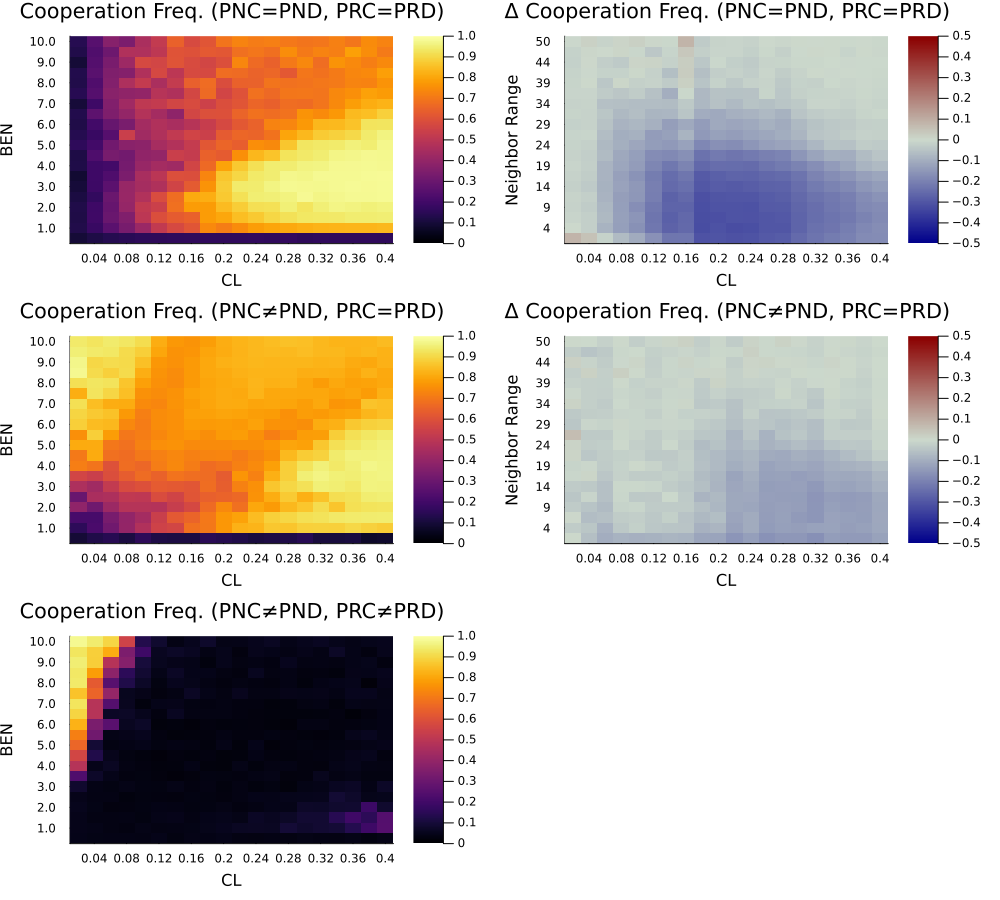

In [11]:
newdata = "NR-50-no-pnd-more-reps.csv"
compData = "anyMom-2.0-ben-no-pnd-more-reps.csv"

newPND = "neighborRange-1-50-more-reps.csv"
compPND = "anyMom-2.0-ben-more-reps.csv"

no = "anyMom_no_pnd_new.csv"
pnd = "anyMom_pnd_new.csv"
prd = "sup_6_prd_new_graphs.csv" 

fig1hmaps = [hmap(no, 20, 3, "Cooperation Freq. (PNC=PND, PRC=PRD)", 0.0, 1.0), 
hmap2(newdata, compData, 20, 3, "Δ Cooperation Freq. (PNC=PND, PRC=PRD)", -0.5, 0.5), 
hmap(pnd, 20, 3, "Cooperation Freq. (PNC≠PND, PRC=PRD)", 0.0, 1.0), 
hmap2(newPND, compPND, 20, 3, "Δ Cooperation Freq. (PNC≠PND, PRC=PRD)", -0.5, 0.5), 
hmap(prd, 20, 3, "Cooperation Freq. (PNC≠PND, PRC≠PRD)", 0.0, 1.0), 

]

#hmap2(newdata, compData, 20, 11, "Δ Connected Components", -25.0, 25.0), hmap2(newdata, compData, 20, 12, "Δ Mean Conn. Comp. Size", -50.0, 50.0), hmap2(newdata, compData, 20, 13, "Δ Largest Conn. Comp.", -45.0, 45.0),hmap2(newdata, compData, 20, 4, "Δ Degree", -5.0, 5.0)
plot(fig1hmaps..., colorbar = true, grid=false, layout = (3,2), size = (1000, 900)) 